# Data project

Analysing the [NSW public schools master dataset](https://data.cese.nsw.gov.au/data/dataset/027493b2-33ad-3f5b-8ed9-37cdca2b8650/resource/2ac19870-44f6-443d-a0c3-4c867f04c305/download/master_dataset.csv
), a compilation of data collected by the NSW Department of Education. The main question I want to answer is: Is our education system fair?

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
import shapely
import fiona
import folium

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
saved_style_state = matplotlib.rcParams.copy()
shp_file_name = "NSW_LOC_POLYGON_shp/NSW_LOC_POLYGON_shp.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = ("https://data.gov.au/data/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/5e295412-357c-49a2-98d5-6caf099c2339/download/nsw_locality_polygon_shp.zip")

Loading in libraries and code for graphing formats

In [2]:
if os.path.isfile("NSW_government_schools.csv"):
    filepath = "NSW_government_schools.csv"
    print("loading from file")
else:
    filepath = "https://data.cese.nsw.gov.au/data/dataset/027493b2-33ad-3f5b-8ed9-37cdca2b8650/resource/2ac19870-44f6-443d-a0c3-4c867f04c305/download/master_dataset.csv"
    print("loading from the internet")

school_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [3]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [4]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)
print("done")

loading from file
done


Loading in the data library

In [5]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)

In [6]:
def cleanup_numbers(n):
    try:
        return float(n)
    except:
        return np.nan
school_data.Indigenous_pct = school_data.Indigenous_pct.apply(cleanup_numbers)
school_data.LBOTE_pct = school_data.LBOTE_pct.apply(cleanup_numbers)
school_data.latest_year_enrolment_FTE = school_data.latest_year_enrolment_FTE.apply(cleanup_numbers)

Cleaning up data

In [7]:
school_data.head()

,School_code,AgeID,School_name,Street,Town_suburb,Postcode,Phone,School_Email,Website,Fax,...,FACS_district,Local_health_district,AECG_region,ASGS_remoteness,Latitude,Longitude,Assets unit,SA4,Healthy canteen,Date_extracted
0,1001,4402.0,Abbotsford Public School,350 Great North Rd,Abbotsford,2046,9713 6220,abbotsford-p.school@det.nsw.edu.au,https://abbotsford-p.schools.nsw.gov.au,9712 1825,...,"South Eastern Sydney, Northern Sydney & Sydney",Sydney,Metropolitan East,Major Cities of Australia,-33.852728,151.131206,Sydney,Sydney - Inner West,N,30/06/2021
1,1002,9333.0,Aberdeen Public School,Segenhoe St,Aberdeen,2336,6543 7271,aberdeen-p.school@det.nsw.edu.au,https://aberdeen-p.schools.nsw.gov.au,6543 7712,...,Hunter New England & Central Coast,Hunter New England,Hunter,Inner Regional Australia,-32.166098,150.888095,Hunter/Central Coast,Hunter Valley exc Newcastle,N,30/06/2021
2,1003,9299.0,Abermain Public School,Goulburn St,Abermain,2326,4930 4210,abermain-p.school@det.nsw.edu.au,https://abermain-p.schools.nsw.gov.au,4930 4319,...,Hunter New England & Central Coast,Hunter New England,Hunter,Major Cities of Australia,-32.808920,151.426499,Hunter/Central Coast,Hunter Valley exc Newcastle,N,30/06/2021
3,1007,10425.0,Adaminaby Public School,9 Cosgrove Street,ADAMINABY,2629,6454 2265,adaminaby-p.school@det.nsw.edu.au,https://adaminaby-p.schools.nsw.gov.au,6454 2552,...,Illawarra Shoalhaven & Southern NSW,Southern NSW,Lower South Coast,Outer Regional Australia,-35.993292,148.776721,Southern NSW,Capital Region,N,30/06/2021
4,1008,9043.0,Adamstown Public School,Bryant St,Adamstown,2289,4957 1114,adamstown-p.school@det.nsw.edu.au,https://adamstown-p.schools.nsw.gov.au,4956 2446,...,Hunter New England & Central Coast,Hunter New England,Hunter,Major Cities of Australia,-32.932213,151.730971,Hunter/Central Coast,Newcastle and Lake Macquarie,N,30/06/2021


Showing first 5 rows of the data set

In [8]:
school_name = 'Alexandria Park Community School'
pd.set_option("display.max_columns", 45)
school_data.loc[school_data['School_name'] == school_name]


,School_code,AgeID,School_name,Street,Town_suburb,Postcode,Phone,School_Email,Website,Fax,latest_year_enrolment_FTE,Indigenous_pct,LBOTE_pct,ICSEA_value,Level_of_schooling,Selective_school,Opportunity_class,School_specialty_type,School_subtype,Support_classes,Preschool_ind,Distance_education,Intensive_english_centre,School_gender,Late_opening_school,Date_1st_teacher,LGA,Electorate,Fed_electorate,Operational_directorate,Principal_network,Operational_directorate_office,Operational_directorate_office_phone,Operational_directorate_office_address,FACS_district,Local_health_district,AECG_region,ASGS_remoteness,Latitude,Longitude,Assets unit,SA4,Healthy canteen,Date_extracted
2143,8556,6425.0,Alexandria Park Community School,Park Rd,Alexandria,2015,9698 1967,alexparkcs-c.school@det.nsw.edu.au,https://alexparkcs-c.schools.nsw.gov.au,9319 5007,910.8,16.0,58.0,1028.0,Central/Community School,Partially Selective,Y,Comprehensive,Kinder to Year 12,NaN,N,N,N,Coed,N,1/01/1982,Sydney (C),Heffron,Sydney,Metropolitan South,Port Jackson,St Peters,9582 5800,"Church St, St Peters 2044","South Eastern Sydney, Northern Sydney & Sydney",Sydney,Metropolitan East,Major Cities of Australia,-33.901164,151.196518,Sydney,Sydney - City and Inner South,N,30/06/2021


# How is the Index of Community Socio-Educational Advantage (ICSEA) value calculated?
- education and occupation of parents
- proportion of indigenous students
- geographical location of school
- values below 800 are considered disadvantaged

Text(0.5, 1.0, 'ICSEA value distibution in NSW public schools')

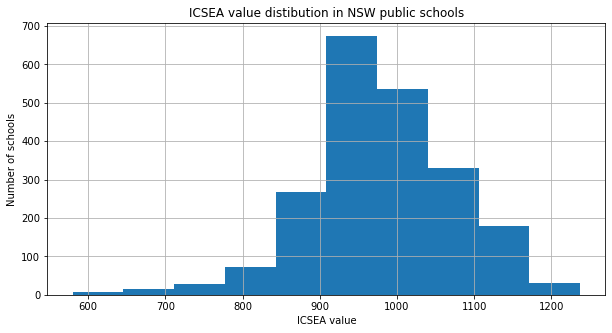

In [9]:
school_data["ICSEA_value"].hist()
plt.xlabel("ICSEA value")
plt.ylabel("Number of schools")
plt.title("ICSEA value distibution in NSW public schools")

Text(0.5, 1.0, 'Public schools with ICSEA values less than 800')

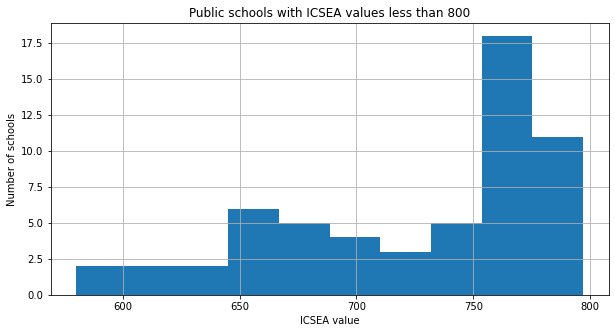

In [10]:
school_data.ICSEA_value[school_data.ICSEA_value < 800].hist()
plt.xlabel("ICSEA value")
plt.ylabel("Number of schools")
plt.title("Public schools with ICSEA values less than 800")

In [11]:
number_of_disadvantaged_schools = school_data.loc[school_data['ICSEA_value'] < 800].count()[0]
print(f"There are {number_of_disadvantaged_schools} disadvantaged schools in NSW")

There are 58 disadvantaged schools in NSW


In [12]:
highest = school_data.ICSEA_value.idxmax()
lowest = school_data.ICSEA_value.idxmin()
print ("The school with the highest ICSEA value is " + str(school_data.loc[highest].School_name) +
         " at " + str(school_data.loc[highest].ICSEA_value) + ".\n"
         "The school with the lowest ICSEA value is " + str(school_data.loc[lowest].School_name) + 
         " at " + str(school_data.loc[lowest].ICSEA_value) +".")

The school with the highest ICSEA value is James Ruse Agricultural High School at 1237.0.
The school with the lowest ICSEA value is Toomelah Public School at 580.0.


# Influcences on ICSEA value
- Selective Schooling
- Language Background
- Enrolments
- Indigenous pct

# Selective schools

Text(0.5, 1.0, 'Not Selective, Partially Selective, and Fully Selective schools in NSW')

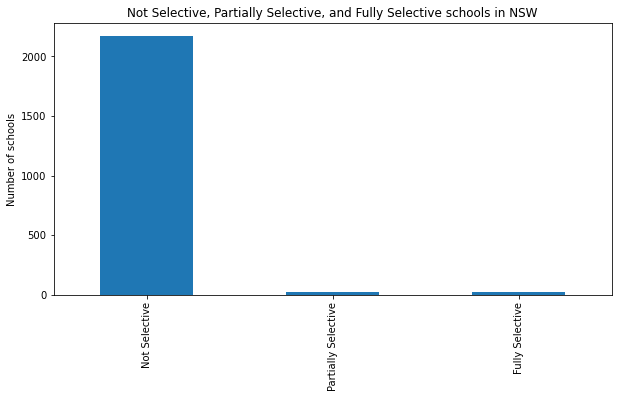

In [13]:
school_data["Selective_school"].value_counts().plot(kind="bar")
plt.ylabel("Number of schools")
plt.title("Not Selective, Partially Selective, and Fully Selective schools in NSW")

Text(0, 0.5, 'Number of Schools')

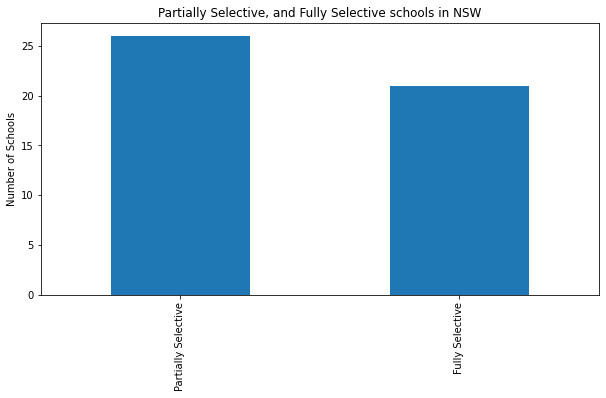

In [14]:
selective_vc = school_data["Selective_school"].value_counts()
selective_vc[selective_vc < 2000].plot(kind="bar")
plt.title("Partially Selective, and Fully Selective schools in NSW")
plt.ylabel("Number of Schools")

Text(0.5, 1.0, 'Not Selective, Partially Selctive, and Fully Selective schools')

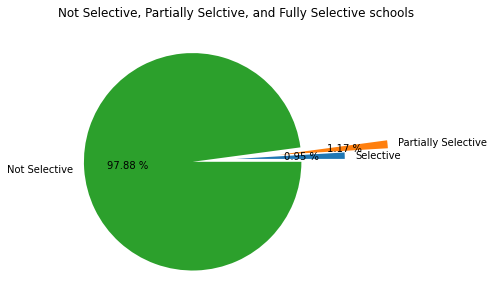

In [15]:
selective = school_data.loc[school_data['Selective_school'] == 'Fully Selective'].count()[0]
p_selective = school_data.loc[school_data['Selective_school'] == 'Partially Selective'].count()[0]
n_selective = school_data.loc[school_data['Selective_school'] == 'Not Selective'].count()[0]
labels = ['Selective', 'Partially Selective', 'Not Selective']
explode = (0, .4, .4)
plt.pie([selective, p_selective, n_selective], labels = labels, autopct='%.2f %%', pctdistance=.6, explode = explode)
plt.title('Not Selective, Partially Selctive, and Fully Selective schools')



In [16]:
school_data.Selective_school.value_counts()

Not Selective          2171
Partially Selective      26
Fully Selective          21
Name: Selective_school, dtype: int64

partially and fully selective schools only account for 2.12% of the total public school count in NSW


# Selective schooling and ICSEA

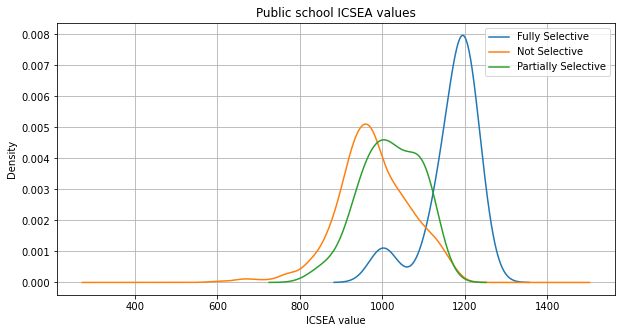

In [17]:
for name, df in school_data.groupby('Selective_school'):
    df.ICSEA_value.plot.density(label = name)
plt.xlabel("ICSEA value")
plt.ylabel("Density")
plt.title("Public school ICSEA values")
plt.legend()
plt.grid()

In [18]:
school_data[(school_data.Selective_school=='Partially Selective') & (school_data.ICSEA_value < 800)]

,School_code,AgeID,School_name,Street,Town_suburb,Postcode,Phone,School_Email,Website,Fax,latest_year_enrolment_FTE,Indigenous_pct,LBOTE_pct,ICSEA_value,Level_of_schooling,Selective_school,Opportunity_class,School_specialty_type,School_subtype,Support_classes,Preschool_ind,Distance_education,Intensive_english_centre,School_gender,Late_opening_school,Date_1st_teacher,LGA,Electorate,Fed_electorate,Operational_directorate,Principal_network,Operational_directorate_office,Operational_directorate_office_phone,Operational_directorate_office_address,FACS_district,Local_health_district,AECG_region,ASGS_remoteness,Latitude,Longitude,Assets unit,SA4,Healthy canteen,Date_extracted


In [19]:
cdf=school_data[['Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'latest_year_enrolment_FTE']]
cdf.head()

,Indigenous_pct,LBOTE_pct,ICSEA_value,latest_year_enrolment_FTE
0,NaN,46.0,1108.0,531.0
1,14.0,6.0,907.0,191.0
2,21.0,3.0,899.0,270.0
3,NaN,0.0,980.0,19.0
4,9.0,14.0,1040.0,317.0


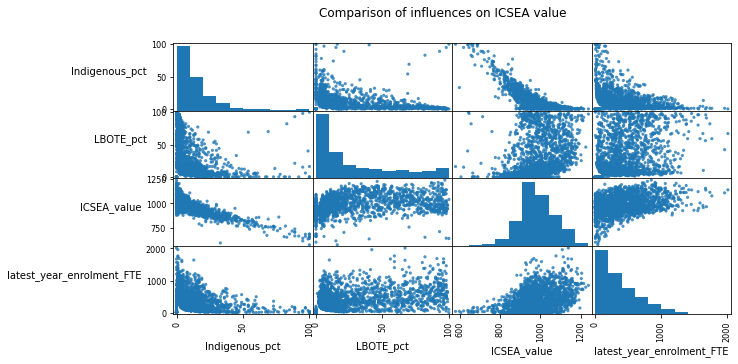

In [20]:
from pandas.plotting import scatter_matrix

#ploting scatter graph of species comparing all features to each other
plot = scatter_matrix(cdf,marker='o', s=10,alpha=.8)
for ax in plot.flatten():
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.suptitle("Comparison of influences on ICSEA value")
plt.show()

In [21]:
def school_target(t):
    if t == 'Not Selective':
        return 0
    elif t == 'Fully Selective':
        return 1
    else:
        return 2
school_data['target'] = school_data.Selective_school.apply(school_target)

# Enrolments and ICSEA

In [22]:
def enrolments_icsea():
    for name, df in school_data.groupby('Selective_school'):
        plt.scatter(df.latest_year_enrolment_FTE, df.ICSEA_value, label=f"{name}({df.shape[0]})", marker="o")

    i = school_data.ICSEA_value.idxmax()
    icsea = school_data.loc[i].ICSEA_value
    name = school_data.loc[i].School_name
    enrolments = school_data.loc[i].latest_year_enrolment_FTE
    plt.annotate((name), (enrolments, icsea), (950, icsea), arrowprops={"arrowstyle":"->"})

    j = school_data.ICSEA_value.idxmin()
    icsea = school_data.loc[j].ICSEA_value
    name = school_data.loc[j].School_name
    enrolments = school_data.loc[j].latest_year_enrolment_FTE
    plt.annotate((name), (enrolments, icsea), (150, icsea), arrowprops={"arrowstyle":"->"})

    plt.xlabel("Number of enrolments")
    plt.ylabel("ICSEA value")
    plt.title("Correlation between enrolments and school ICSEA value")
    plt.legend()
    plt.grid()

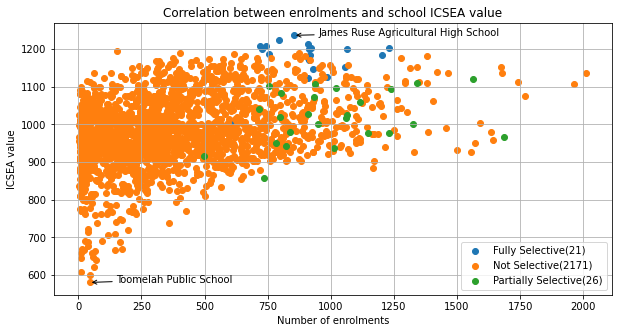

In [23]:
enrolments_icsea()

Lower ICSEA value schools have close to 0 enrolements. however there are also schools above 800 ICSEA value that still have 0 enrolements. most selective schools enroll around 750 - 1250 students however non selective schools usually take in 0 - 750 students. This makes sense as there are a lot less selective schools meaning demand is a lot higher. There is also a lot less enrolments for disadvantaged schools maybe suggesting they are rural schools.

# Language Background and ICSEA

In [24]:
def language_icsea():
    for name, df in school_data.groupby('Selective_school'):
        plt.scatter(df.LBOTE_pct, df.ICSEA_value, label=f"{name}({df.shape[0]})", marker="o")

    i = school_data.ICSEA_value.idxmax()
    icsea = school_data.loc[i].ICSEA_value
    name = school_data.loc[i].School_name
    language = school_data.loc[i].LBOTE_pct
    plt.annotate((name), (language, icsea), (80, 1250), arrowprops={"arrowstyle":"->"})

    j = school_data.ICSEA_value.idxmin()
    icsea = school_data.loc[j].ICSEA_value
    name = school_data.loc[j].School_name
    language = school_data.loc[j].LBOTE_pct
    plt.annotate((name), (language, icsea), (20, icsea), arrowprops={"arrowstyle":"->"})

    plt.xlabel("Language background other than english (%)")
    plt.ylabel("ICSEA value")
    plt.title("Correlation between Language background other than english and school ICSEA value")
    plt.legend()
    plt.grid()


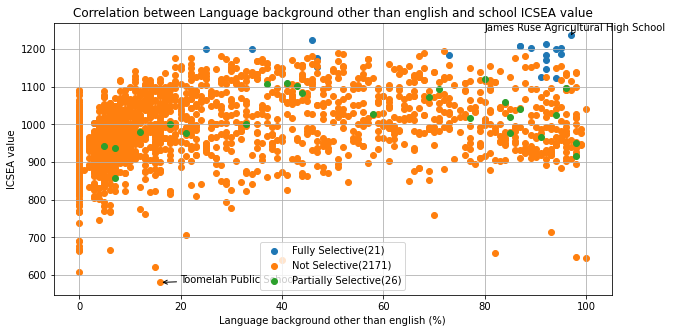

In [25]:
language_icsea()

We can see that fully selective schools almost always have above 80% of students with a language background other than english. Partially selective schools are more spread out however they are still more skewed towards 100%. Additionally, most Non selective schools have a very low LBOTE percentage

# Indigenous percentage and ICSEA

In [26]:
def indigenous_icsea():
    for name, df in school_data.groupby('Selective_school'):
        plt.scatter(df.Indigenous_pct, df.ICSEA_value, label=f"{name}({df.shape[0]})", marker="o")

    i = school_data.ICSEA_value.idxmax()
    icsea = school_data.loc[i].ICSEA_value
    name = school_data.loc[i].School_name
    indigenous = school_data.loc[i].Indigenous_pct
    plt.annotate((name), (indigenous, icsea), (5, 1250), arrowprops={"arrowstyle":"->"})

    j = school_data.ICSEA_value.idxmin()
    icsea = school_data.loc[j].ICSEA_value
    name = school_data.loc[j].School_name
    indigenous = school_data.loc[j].Indigenous_pct
    plt.annotate((name), (indigenous, icsea), (80, icsea), arrowprops={"arrowstyle":"->"})

    plt.legend()
    plt.xlabel("Indigenous percentage")
    plt.ylabel("ICSEA value")
    plt.title("Correlation between Indigenous Percentages and school ICSEA value")
    plt.grid()
    plt.legend()

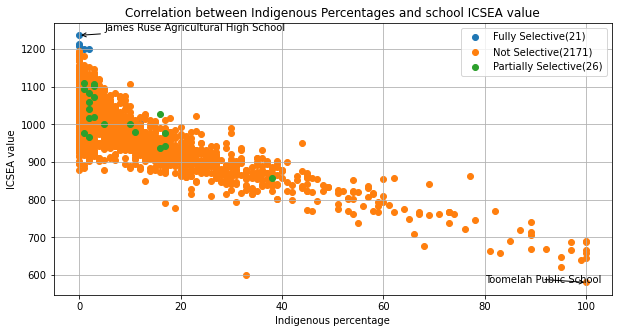

In [27]:
indigenous_icsea()

We can see that the high ICSEA value schools have close to 0 indigenous students but as the ICSEA value gets lower, the indigenous percentage gets higher. Additionally, almost all selective schools have very low indigenous schools.

In [28]:
def iterrow_test(school_data, col):
    for i, row in school_data.iterrows():
        val = row[col]
        if val < 2000:
            school_data.at[i,col] = 0 
        else:
            school_data.at[i,col] = terrow_test(school_data, 'ICSEA_value')

In [29]:
plt.rcParams['figure.figsize'] = (20, 10)

# Location and ICSEA

In [30]:
def school_locations():
    nsw_map = burbs.geometry.convex_hull.plot(color = 'lightgrey')
    for name, df in school_data.groupby('Selective_school'):
        plt.scatter(df.Longitude, df.Latitude, label=f"{name}({df.shape[0]})", marker="o")

    i = school_data.ICSEA_value.idxmax()
    long = school_data.loc[i].Longitude
    name = school_data.loc[i].School_name
    lat = school_data.loc[i].Latitude
    plt.annotate((name), (long, lat), (153, lat), arrowprops={"arrowstyle":"->"})

    j = school_data.ICSEA_value.idxmin()
    long = school_data.loc[j].Longitude
    name = school_data.loc[j].School_name
    lat = school_data.loc[j].Latitude
    plt.annotate((name), (long, lat), (150, -28), arrowprops={"arrowstyle":"->"})

    plt.title("Locations of NSW Government Schools")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.annotate("Sydney CBD", (151, -34), (152, -35), arrowprops={"arrowstyle":"->"})
    plt.annotate("Canberra CBD", (149, -35), (153, -36.5), arrowprops={"arrowstyle":"->"})
    plt.legend()
    plt.grid()

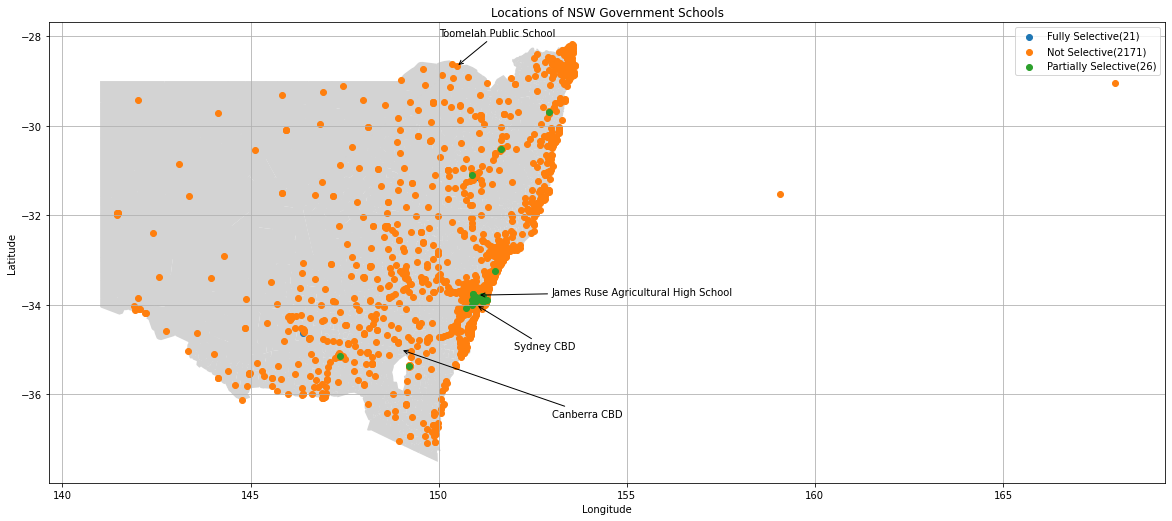

In [31]:
school_locations()

In [32]:
def selective_locations():
    nsw_map = burbs.geometry.convex_hull.plot(color = 'lightgrey')
    filter_schools = school_data[school_data["Selective_school"] != "Not Selective"]
    for name, df in filter_schools.groupby('Selective_school'):
        plt.scatter(df.Longitude, df.Latitude, label=f"{name}({df.shape[0]})", marker="o")

    plt.title("Locations of Fully and Partially selective schools")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.annotate("Sydney CBD", (151, -34), (152, -35), arrowprops={"arrowstyle":"->"})
    plt.annotate("Canberra CBD", (149, -35), (152, -36), arrowprops={"arrowstyle":"->"})
    plt.grid()

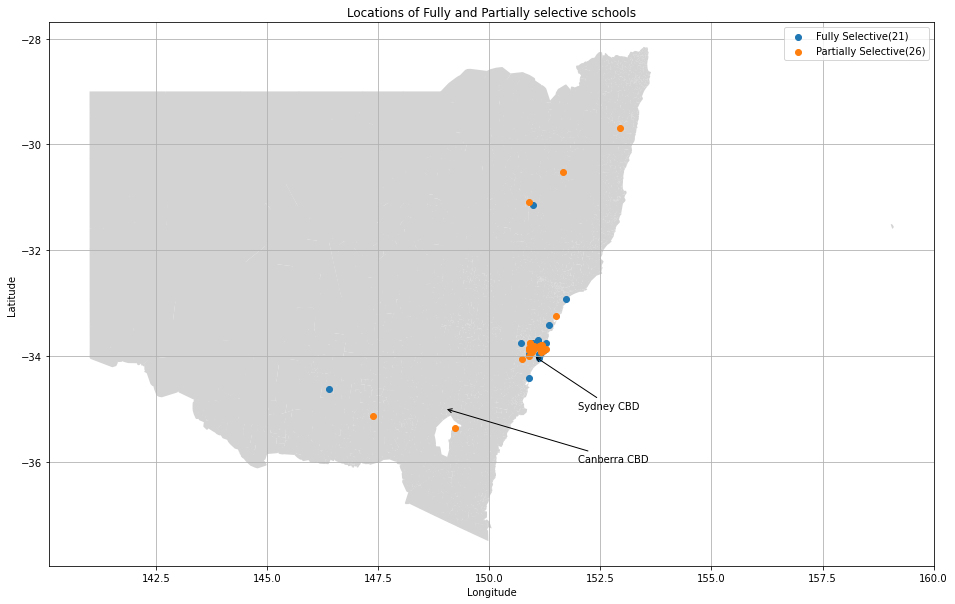

In [33]:
selective_locations()

In [34]:
def disadvantaged_locations():
    nsw_map = burbs.geometry.convex_hull.plot(color = 'lightgrey')
    disadvantaged_schools = school_data[school_data["ICSEA_value"] < 800]
    for name, df in disadvantaged_schools.groupby('Selective_school'):
        plt.scatter(df.Longitude, df.Latitude, label=f"{name}({df.shape[0]})", marker="o")
    plt.title("Locations of disadvantaged schools")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.annotate("Sydney CBD", (151, -34), (152, -35), arrowprops={"arrowstyle":"->"})
    plt.annotate("Canberra CBD", (149, -35), (152, -36), arrowprops={"arrowstyle":"->"})
    plt.grid()

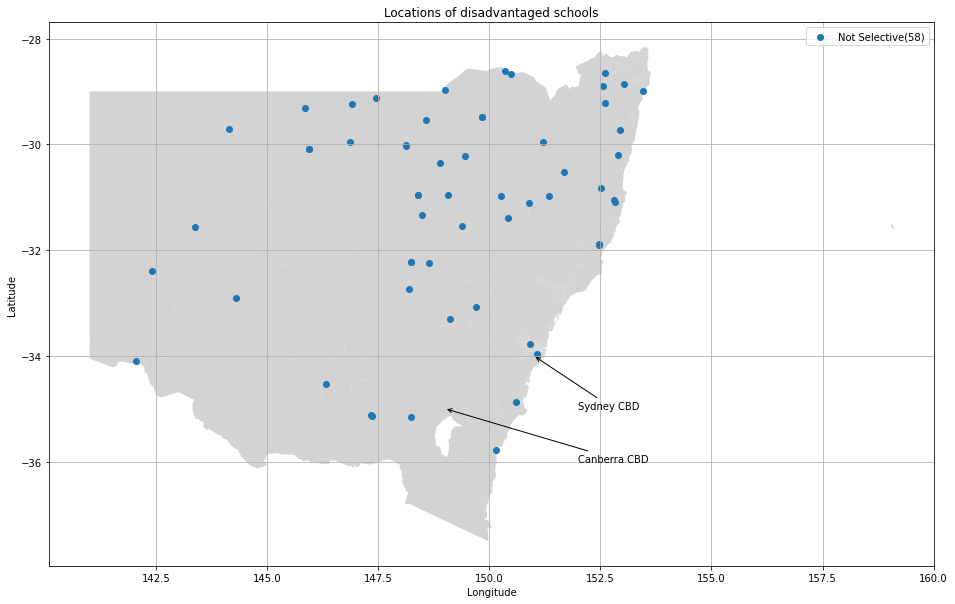

In [35]:
disadvantaged_locations()

In [36]:
m = folium.Map(location =[-33.8708, 151.2073], zoom_start=11, max_zoom=18)
disadvantaged_schools = school_data[school_data["ICSEA_value"] < 800]
for (index, row) in disadvantaged_schools.iterrows():
# for (index, row) in school_data.iterrows():
    folium.Marker(location=[row.loc['Latitude'], row.loc['Longitude']], 
                    popup=row.loc['School_name'] + ' ' + "ICSEA value: " + str(row.loc['ICSEA_value']),
                    tooltip='Click for more info').add_to(m)
m

![](stats.PNG)

# Conclusion
- If you attened any form of selective schooling you are more educationally advantaged then most
- Living in rural areas or disadvantaged areas means your school is also likely disadvantaged
- Having higher indigenous percentage meant you were more educationally disadvantaged
- Attending a school with more than 500 enrolements will likely put you in an advantaged school
- Language backgrounds dont generally affect educational disadvantage